In [1]:
from scipy.constants import physical_constants as const
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib 

rc_params = {'lines.linewidth':1.5, 'text.usetex':True}
#sns.set(style='ticks', font='serif', palette=sns.cubehelix_palette(), context='paper', font_scale=1.4, rc=rc_params)

#%matplotlib widget

In [2]:
# Setting all constants
k_B = const['Boltzmann constant'][0]
u = const['atomic mass constant'][0]
dx = 1e-3
g = const['standard acceleration of gravity'][0]
m = 23*u
N = 10**7

In [3]:
# Defining usefull subfunctions
def delv(T):
    return np.sqrt(k_B*T/m)

def a(T, t):
    return 1/(2*delv(T)**2) + t**2/(2*dx**2)
    
def b(x, t):
    return (2*x*t + g*t**3)/(2*dx**2)

def c(x, t):
    return -(x**2 + +x*g*t**2 + 0.25*g**2*t**4)/(2*dx**2)
    
def prefactor(T):
    return N/(2*np.pi*dx*delv(T))

def n(x, t, T):
    return prefactor(T)*np.sqrt(np.pi/a(T,t))*np.exp(b(x,t)**2/(4*a(T,t))+ c(x,t))

Norm = 0.9999000000000002
Norm = 0.9998999979042694
Norm = 0.9998981975564885
Norm = 0.999899222999265


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


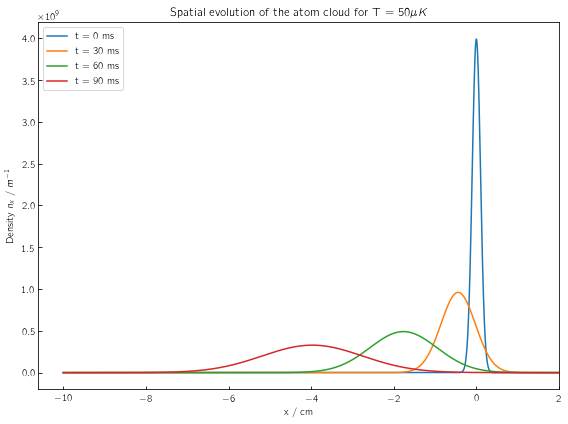

In [6]:
times = np.array([0,30,60, 90])*1e-3
T = 50e-6

fig = plt.figure(figsize=(8,6))
axe = fig.add_subplot(111)

steps = 10000
x = np.linspace(-0.1, 0.02, steps)
#axe.plot(x, n(x,0,T))



for t in times:
    y = n(x,t,T)
    #axe.plot(x,b(x,t))
    #axe.plot(x,c(x,t))
    axe.plot(x*100,y, label='t = {0:.0f} ms'.format(t*1e3))
    print('Norm = {0}'.format(np.sum(y*(max(x)-min(x))/steps)/N))
    
axe.legend(loc=0)
axe.set_xlim(xmax = max(x*100))
axe.set_xlabel('x / cm')
axe.set_ylabel('Density $n_x$ / $m^{-1}$')

plt.tick_params(
       axis='y',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='on',      # ticks along the bottom edge are off
       right='off',         # ticks along the top edge are off
       labelright='off') # labels along the bottom edge are off
plt.tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       bottom='on',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='on') # labels along the bottom edge are off

axe.set_title(r'Spatial evolution of the atom cloud for T = {0:.0f}$\mu K$'.format(T*1e6))
fig.tight_layout()
#fig.savefig('AAMP_Sheet5_1.pdf')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


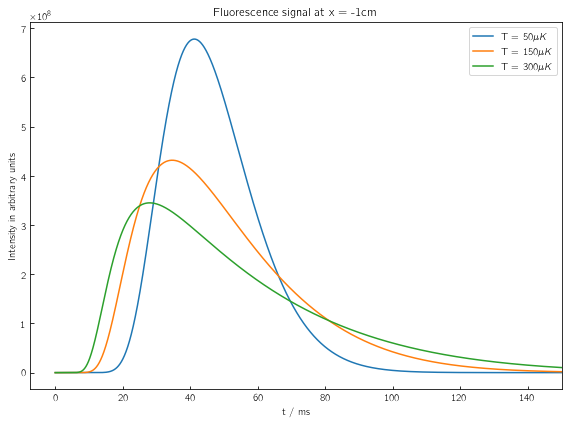

In [7]:
temps = np.array([50,150,300])*1e-6
times = np.linspace(0, 0.15, 10000)
pos = -0.01

fig = plt.figure(figsize=(8,6))
axe = fig.add_subplot(111)

for T in temps:
    axe.plot(times*1000, n(pos, times, T), label='T = {0:.0f}$\mu K$'.format(T*1e6))

axe.legend(loc=0)

plt.tick_params(
       axis='y',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       left='on',      # ticks along the bottom edge are off
       right='off',         # ticks along the top edge are off
       labelright='off') # labels along the bottom edge are off
plt.tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       bottom='on',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='on') # labels along the bottom edge are off

axe.set_title(r'Fluorescence signal at x = {0:.0f}cm'.format(pos*100))

axe.set_xlabel("t / ms")
axe.set_xlim(xmax=max(times*1000))
axe.set_ylabel('Intensity in arbitrary units')

fig.tight_layout()
#fig.savefig('AAMP_Sheet5_2.pdf', dpi=100)